## _Topic Modeling based on Reviews_
***
<b>DESCRIPTION</b>

You are asked to analyze customer reviews from an e-commerce platform. More specifically, you will perform topic modeling to identify common themes in the reviews, apply POS tagging to extract grammatical information and utilize lemmatization to normalize the words for better
analysis.

<b>Problem Statement: </b>

A popular mobile phone brand, Lenovo has launched their budget smartphone in the Indian market. The client wants to understand the VOC (voice of the customer) on the product. This will be useful to not just evaluate the current product, but to also get some direction for developing the product pipeline. The client is particularly interested in the different aspects that customers care about. Product reviews by customers on a leading e-commerce site should provide a good view.

<b>Domain: Amazon reviews for a leading phone brand</b>

- Analysis to be done: POS tagging, topic modeling using LDA, and topic interpretation

<b> Content: </b>

- Dataset: ‘K8 Reviews v0.2.csv’

<b>Columns:</b>
- Sentiment: The sentiment against the review (4,5 star reviews are positive, 1,2 are negative)
- Reviews: The main text of the review

<b>Steps to perform:</b>

Discover the topics in the reviews and present it to business in a consumable format. Employ techniques in syntactic processing and topic modeling.
Perform specific cleanup, POS tagging, and restricting to relevant POS tags, then, perform topic modeling using LDA. 

<b>Tasks: </b>
- Read the .csv file using Pandas. Take a look at the top few records.
- Normalize casings for the review text and extract the text into a list for easier manipulation.
- Tokenize the reviews using NLTKs word_tokenize function.
- Perform parts-of-speech tagging on each sentence using the NLTK POS tagger.
- For the topic model, we should  want to include only nouns.
- Find out all the POS tags that correspond to nouns.
- Limit the data to only terms with these tags.
- Lemmatize. 
- Different forms of the terms need to be treated as one.
- No need to provide POS tag to lemmatizer for now.
- Remove stopwords and punctuation (if there are any). 
- Create a topic model using LDA on the cleaned up data with 12 topics.
- Print out the top terms for each topic.
- What is the coherence of the model with the c_v metric?
- Analyze the topics through the business lens.
- Determine which of the topics can be combined.
- Create topic model using LDA with what you think is the optimal number of topics
- What is the coherence of the model?
- Create a table with the topic name and the top 10 terms in each to present to the  business.



In [22]:
# write the list of necessary packages here:
!pip install pandas
!pip install nltk
!pip install spacy
!pip install scikit-learn
!pip install gensim
!pip install matplotlib
!pip install seaborn
!pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached numpy-2.0.2-cp311-cp311-macosx_14_0_arm64.whl (5.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl (14.0 MB)
  

## _Import Libraries and Load the Data_

In [23]:
# import your packages here:
import nltk
import ssl
import re
import string
import numpy as np
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Phrases
from gensim.models.phrases import Phraser
#file and system operations
import os
import sys
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aysegulozturk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aysegulozturk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aysegulozturk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aysegulozturk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### _Load the Reviews Data_

In [24]:
reviews = pd.read_csv('K8 Reviews v0.2.csv',delimiter=',')
reviews.head(3)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...


In [25]:
#check the number of reviews 
len(reviews)

14675

In [26]:
#check the basic info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


- _There are no null values or missing values in the dataset_

In [27]:
#check the sentiment labels
reviews['sentiment'].value_counts()

sentiment
0    7712
1    6963
Name: count, dtype: int64

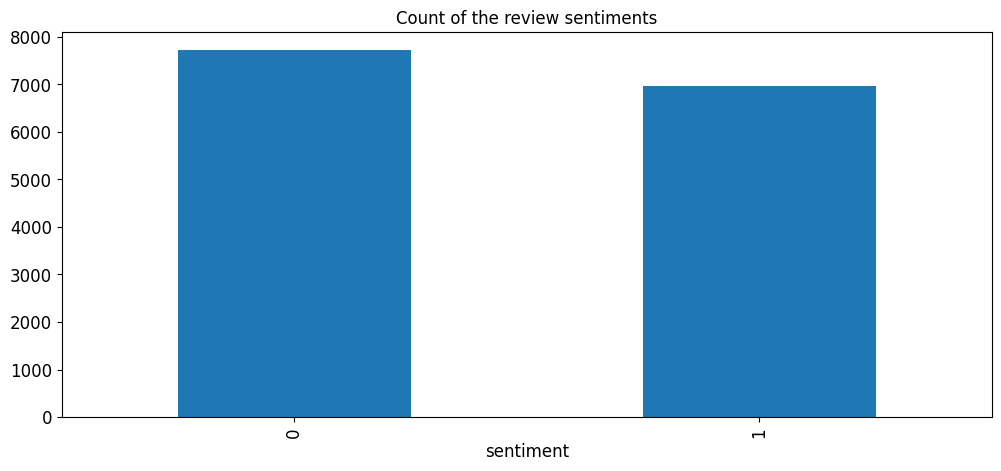

In [28]:
# sns.countplot(reviews['sentiment'])
reviews['sentiment'].value_counts().plot(kind= 'bar')
plt.title('Count of the review sentiments')
plt.show()

- _The data seems to be fairly balanced. However, the objective of this project is to do topic modeling and not sentiment classification_

## _Text Preprocessing_
_Following steps will be performed_
- Tokenization - Split the text into sentences and sentences into words. Lowercase the words and remove any punctuation_
- All stopwords will be removed_
- Eliminate the tokens except nouns, noun phrases and verbs.
- Words are lemmatized - words in third person are changed to first person and words in future and past tense are changed to present tense_

In [29]:
# write your code here:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

pos_map = {'N': wordnet.NOUN, 'V': wordnet.VERB} 

processed_reviews = [
    [
        lemmatizer.lemmatize(word, pos_map.get(pos[0], wordnet.NOUN))
        for word, pos in pos_tag(
            [w for w in word_tokenize(review.lower()) if w not in stop_words and not re.match(r'^\W+$', w) and w not in string.punctuation]
        )
        if pos.startswith('NN') or pos.startswith('VB')
    ]
    for review in reviews['review'].astype(str)
]

for i in processed_reviews[:10]:
    print(i)

['need', 'update', 'improvement']
['mobile', 'buy', 'drain', 'hell', 'backup', 'hour', 'us', 'put', 'get', 'lie', 'amazon', 'lenove', 'expect', 'make', 'say', 'battery', 'booster', 'charger', 'fake', 'take', 'hour', 'charged.do', 'know', 'make', 'us.please', 'go', 'regret']
['get', 'cash']
[]
['phone', 'everthey', 'change', 'phone', 'problem', 'amazon', 'return', 'phone', 'amazon']
["'m", 'tell', 'buyi', "'m", 'batterypoor', 'camerawaste', 'money']
['phone', 'charge', 'heat', 'allot', 'reason', 'hate', 'lenovo', 'k8', 'note']
['battery', 'level', 'worn']
['hit', 'problem', 'phone', 'hang', 'problem', 'lenovo', 'k', 'note', 'service', 'station', 'ahmedabad', 'year', 'warranty', 'change', 'phone', 'lenovo']
['lot', 'glitch', 'dont', 'buy', 'thing', 'go', 'option']


### Topic Modeling

Implement topic modeling using Latent Dirichlet Allocation (LDA) which is a topic modeling technique for uncovering the central topics and their distributions across a set of documents. Identify and list the top 5 topics found in the reviews along with their associated keywords.

In [30]:
# write your code here:
bigram_model = Phraser(Phrases(processed_reviews, min_count=3, threshold=100))
bigram_list = [bigram_model[sentence] for sentence in processed_reviews]

dictionary = corpora.Dictionary(bigram_list)
dictionary.filter_extremes(no_below=10, no_above=0.4)

corpus = [dictionary.doc2bow(sentence) for sentence in bigram_list]

model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15, random_state=42)

topics = model.print_topics(num_words=10)

for topic_id, topic_terms in topics:
    print(f"Topic {topic_id + 1}: {topic_terms}")


coherence_model = CoherenceModel(model=model, texts=bigram_list, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")



Topic 1: 0.233*"product" + 0.049*"money" + 0.034*"amazon" + 0.032*"receive" + 0.026*"delivery" + 0.026*"return" + 0.024*"value" + 0.022*"hai" + 0.021*"service" + 0.016*"buy"
Topic 2: 0.132*"camera" + 0.078*"phone" + 0.054*"quality" + 0.033*"price" + 0.028*"performance" + 0.026*"feature" + 0.019*"mobile" + 0.016*"battery" + 0.016*"look" + 0.015*"range"
Topic 3: 0.128*"phone" + 0.045*"buy" + 0.041*"get" + 0.031*"use" + 0.027*"issue" + 0.021*"day" + 0.017*"time" + 0.017*"work" + 0.015*"heat" + 0.015*"month"
Topic 4: 0.160*"battery" + 0.102*"charge" + 0.060*"heat" + 0.056*"phone" + 0.050*"problem" + 0.043*"drain" + 0.034*"issue" + 0.033*"backup" + 0.029*"heating" + 0.026*"charger"
Topic 5: 0.079*"note" + 0.048*"work" + 0.048*"k8" + 0.040*"lenovo" + 0.035*"call" + 0.032*"screen" + 0.023*"speaker" + 0.020*"option" + 0.015*"miss" + 0.015*"feature"
Coherence Score: 0.6342022097069804


In [31]:
topic_terms = {}

for topic_id, topic_terms_list in model.print_topics(num_words=10):
    topic_terms[topic_id] = [term.split('*')[1].strip('"') for term in topic_terms_list.split(' + ')]

topics_df = pd.DataFrame.from_dict(topic_terms, orient='index')
topics_df.columns = [f"Term {i + 1}" for i in range(10)]
topics_df.index = [f"Topic {i + 1}" for i in range(5)] 

print(topics_df)

          Term 1  Term 2   Term 3   Term 4       Term 5   Term 6   Term 7  \
Topic 1  product   money   amazon  receive     delivery   return    value   
Topic 2   camera   phone  quality    price  performance  feature   mobile   
Topic 3    phone     buy      get      use        issue      day     time   
Topic 4  battery  charge     heat    phone      problem    drain    issue   
Topic 5     note    work       k8   lenovo         call   screen  speaker   

          Term 8   Term 9  Term 10  
Topic 1      hai  service      buy  
Topic 2  battery     look    range  
Topic 3     work     heat    month  
Topic 4   backup  heating  charger  
Topic 5   option     miss  feature  


In [32]:
topics_list = [
    max(model[doc_bow], key=lambda x: x[1])[0] for doc_bow in corpus
]

review_list = reviews['review'].astype(str).tolist() 

reviews_from_topics = {i: [] for i in range(model.num_topics)} 

for id_a, topic_a in enumerate(topics_list):
    reviews_from_topics[topic_a].append(review_list[id_a]) 

for topic_num, reviews_a in sorted(reviews_from_topics.items()):
    print(f"\nTopic {topic_num + 1}:")
    print("\n".join(reviews_a[:3])) 



Topic 1:
when I will get my 10% cash back.... its already 15 January..
Good
headset is not available

Topic 2:
Good but need updates and improvements
Excellent camera , excellent speed.excellent features.excelent battery.
Awesome phone in this price and this is my second mobile from lenovo. It is fast and display has been improved.

Topic 3:
Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.
The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon
Only I'm telling don't

### Reporting

Summarizing the findings, including:
• How did you select the number of topics?
• Coherence score measures how semantically related the top words are in each topic.
Which coherence type did you employ (c v, u mass or uci)?
• The most common topics identified in the reviews.
• Print examples of reviews that belong to each topic.

**Topic Number**
- I selected the number of topics as 5 given the description.

**Coherence Measure**
- I used type c_v coherence. The coherence score achieved is 0.6342022097069804. 
c_v focuses on the degree of semantic similarity between the top words of each topic. Since it's a good metric for this analysis, I chose to use c_v.

**Most Common Topics**
- The most common topics identified in the reviews are:
- **Topic 1:** Customer Service and Product Experience
- **Topic 2:** Camera, Quality, and Price
- **Topic 3:** User Issues and Negative Experiences
- **Topic 4:** Battery and Heating Problems
- **Topic 5:** Lenovo K8 Note: Missing Features and Build Issues

**Keywords of Topics**
          Term 1  Term 2   Term 3   Term 4       Term 5   Term 6   Term 7  Term 8   Term 9   Term 10
Topic 1  product   money   amazon  receive     delivery   return    value  hai      service  buy
Topic 2   camera   phone  quality    price  performance  feature   mobile  battery  look     range
Topic 3    phone     buy      get      use        issue      day     time  work     heat     month
Topic 4  battery  charge     heat    phone      problem    drain    issue  backup   heating  charger
Topic 5     note    work       k8   lenovo         call   screen  speaker  option   miss     feature

**Examples of Reviews**
- Examples of reviews that belong to each topic are:

- **Topic 1:**
- when I will get my 10% cash back.... its already 15 January..
- Good
- headset is not available

- **Topic 2:**
- Good but need updates and improvements
- Excellent camera , excellent speed.excellent features.excelent battery.
- Awesome phone in this price and this is my second mobile from lenovo. It is fast and display has been improved.

- **Topic 3:**
- Worst mobile i have bought ever, Battery is draining like hell, backup is only 6 to 7 hours with internet uses, even if I put mobile idle its getting discharged.This is biggest lie from Amazon & Lenove which is not at all expected, they are making full by saying that battery is 4000MAH & booster charger is fake, it takes at least 4 to 5 hours to be fully charged.Don't know how Lenovo will survive by making full of us.Please don;t go for this else you will regret like me.
- The worst phone everThey have changed the last phone but the problem is still same and the amazon is not returning the phone .Highly disappointing of amazon
- Only I'm telling don't buyI'm totally disappointedPoor batteryPoor cameraWaste of money

- **Topic 4:**
- The battery level has worn down
- Wrost
- Don't purchase this item, It is so much of heating &Battery life is very poor

- **Topic 5:**
- Phone is awesome. But while charging, it heats up allot..Really a genuine reason to hate Lenovo k8 note
- Galery problem and there is not atmos speakerNormal speaker in this phone
- Does not have many options like cast screen, with or without WiFi. No call recording option available. Doesn't even connect mobile hotspot

**Conclusion:**
- After I processed review sentences from the csv file, I used a bigram language model instead of unigram or bag-of-words for topic modeling. This approach allowed for the capture of word pair relationships. In this way, a higher coherence score and more coherent and semantically meaningful topics were achieved. While a trigram model could have potentially enhanced the quality further by capturing three-word phrases, I opted for the bigram model for its balance between interpretability and computational efficiency.


### Visualization

Plot word clouds for each topic displaying associated keywords

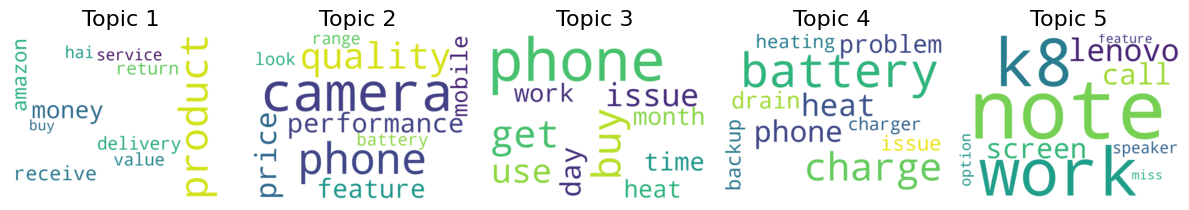

In [33]:
# write your code here:

def plot_topic_wordclouds(model, num_topics, figsize=(12, 8)):
    fig, axes = plt.subplots(1, num_topics, figsize=figsize, sharex=True, sharey=True)
    
    for i, ax in enumerate(axes):
        topic_words = dict(model.show_topic(i, topn=10))
        
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(topic_words)
        
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis("off")
        ax.set_title(f"Topic {i + 1}", fontsize=16)
    
    plt.tight_layout()
    plt.show()

plot_topic_wordclouds(model, num_topics=5)

